### Regression (Supervised ML)

Project: House Price Prediction (Latest Twist: Airbnb Prices)

Dataset: Airbnb NYC Dataset

Goal: Predict rental prices based on features (location, room type, amenities)

Techniques:

Base: Linear Regression, Decision Trees

Advanced: Gradient Boosting (XGBoost)

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [3]:
df=pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### we dont neeed id,last_review and host_review as they are not more important in data analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.drop(['id','name','host_name','last_review','host_id','number_of_reviews','calculated_host_listings_count'], axis=1, inplace=True)

In [11]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,0.21,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,0.38,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,NaN,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,4.64,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0.10,0


In [12]:
#m=df['reviews_per_month'].mean()
df.fillna({'reviews_per_month':0},inplace =True)

In [13]:
df.isnull().sum()

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
reviews_per_month      0
availability_365       0
dtype: int64

In [14]:
df.duplicated().sum()

0

### Lets see values of object dtypes for better understanding

In [16]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
x=len(df["neighbourhood"].unique())
x

221

In [18]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Lets do data cleaning part 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
df_en = [['neighbourhood_group', 'room_type']]

In [22]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True,dtype=int)

In [23]:
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,reviews_per_month,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,Kensington,40.64749,-73.97237,149,1,0.21,365,1,0,0,0,1,0
1,Midtown,40.75362,-73.98377,225,1,0.38,355,0,1,0,0,0,0
2,Harlem,40.80902,-73.94190,150,3,0.00,365,0,1,0,0,1,0
3,Clinton Hill,40.68514,-73.95976,89,1,4.64,194,1,0,0,0,0,0
4,East Harlem,40.79851,-73.94399,80,10,0.10,0,0,1,0,0,0,0


### Using frequency encoding 

In [25]:
freq_map = df['neighbourhood'].value_counts().to_dict()
df['neighbourhood'] = df['neighbourhood'].map(freq_map)   

In [26]:
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,reviews_per_month,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,175,40.64749,-73.97237,149,1,0.21,365,1,0,0,0,1,0
1,1545,40.75362,-73.98377,225,1,0.38,355,0,1,0,0,0,0
2,2658,40.80902,-73.94190,150,3,0.00,365,0,1,0,0,1,0
3,572,40.68514,-73.95976,89,1,4.64,194,1,0,0,0,0,0
4,1117,40.79851,-73.94399,80,10,0.10,0,0,1,0,0,0,0


In [27]:
df = df[(df['price'] >= 10) & (df['price'] <= 450)]
## threeshold for removing outliers

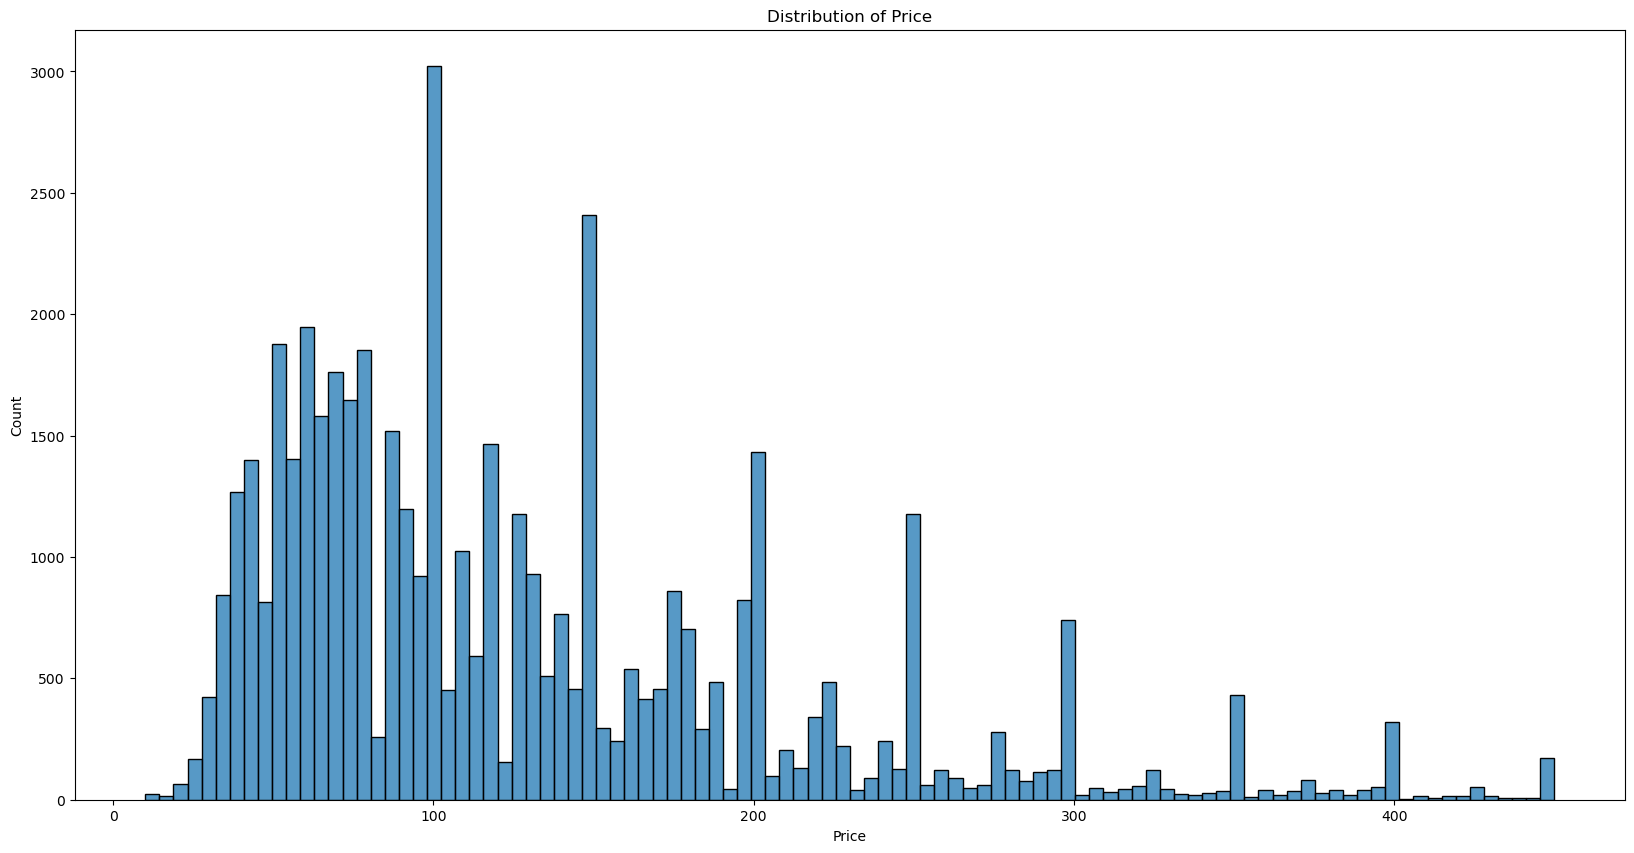

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.histplot(df['price'], bins=100)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit_transform(df)

array([[-1.06539974, -1.48013888, -0.45169925, ..., -0.08829348,
         1.06929548, -0.1574002 ],
       [ 0.01962941,  0.45266877, -0.69798897, ..., -0.08829348,
        -0.9351952 , -0.1574002 ],
       [ 0.9011166 ,  1.46159692,  0.20658563, ..., -0.08829348,
         1.06929548, -0.1574002 ],
       ...,
       [ 0.9011166 ,  1.56594995,  0.0603241 , ..., -0.08829348,
        -0.9351952 , -0.1574002 ],
       [ 0.34672215,  0.52351228, -0.85678102, ..., -0.08829348,
        -0.9351952 ,  6.35323202],
       [ 0.34672215,  0.64243468, -0.81810921, ..., -0.08829348,
         1.06929548, -0.1574002 ]])

In [31]:
X = df.drop('price', axis=1) 
y = df['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [33]:
X.shape

(47444, 12)

In [34]:
y.shape

(47444,)

#### Model building  
1.Linear regression

In [36]:
LR= LinearRegression()

In [37]:
LR.fit(X_train,y_train)

LinearRegression()

In [38]:
LR.intercept_

-18934.52779901746

In [39]:
LR.coef_

array([ 4.15872225e-03, -1.51055427e+02, -3.41526764e+02, -2.44363929e-01,
       -1.63348390e+00,  8.21180464e-02, -3.27581255e+01,  1.08665360e+01,
       -5.22266747e+00, -1.15061431e+02, -8.54465158e+01, -1.10327024e+02])

In [40]:
y_preds=LR.predict(X_test)
y_preds

array([211.07002668,  69.86621265, 171.65387331, ..., 122.6403738 ,
       199.88144518, 200.78233103])

In [41]:

from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error,root_mean_squared_error,r2_score

class Score:
    def __init__(self, y_test, y_preds):
        self.y_test = y_test
        self.y_preds = y_preds
        self.mae = None
        self.mse = None
        self.rmse = None
        self.r2 = None
        self.adj_r2 = None

    def calculate(self):
        n = len(self.y_test)
        p = 15  # number of features 
        
        self.mae = mean_absolute_error(self.y_test, self.y_preds)
        self.mse = mean_squared_error(self.y_test, self.y_preds)
        self.rmse = np.sqrt(self.mse)
        self.r2 = r2_score(self.y_test, self.y_preds)
        self.adj_r2 = 1 - (1 - self.r2) * (n - 1) / (n - p - 1)

    def display(self):
        print("Mean Absolute Error (MAE):", self.mae)
        print("Mean Squared Error (MSE):", self.mse)
        print("Root Mean Squared Error (RMSE):", self.rmse)
        print("R² Score:", self.r2)
        print("Adjusted R²:", self.adj_r2)


In [42]:
sc = Score(y_test, y_preds)
sc.calculate()
sc.display()

Mean Absolute Error (MAE): 43.75377354530528
Mean Squared Error (MSE): 3937.4676144481737
Root Mean Squared Error (RMSE): 62.74924393527123
R² Score: 0.42236975369778373
Adjusted R²: 0.42176035338166806


In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [107]:
rd = Ridge(alpha=1.0)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

sc1 = Score(y_test, y_pred_rd)
sc1.calculate()
sc1.display()

Mean Absolute Error (MAE): 43.73969349041976
Mean Squared Error (MSE): 3937.4491179881225
Root Mean Squared Error (RMSE): 62.74909655117054
R² Score: 0.4223724671460761
Adjusted R²: 0.4217630696926503


In [109]:
la = Lasso()
la.fit(X_train, y_train)
y_pred_la = la.predict(X_test)

sc1 = Score(y_test, y_pred_la)
sc1.calculate()
sc1.display()

Mean Absolute Error (MAE): 45.16715617223729
Mean Squared Error (MSE): 4143.508491016576
Root Mean Squared Error (RMSE): 64.3700900342432
R² Score: 0.39214336101741865
Adjusted R²: 0.3915020718357658


In [111]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [113]:
sc1 = Score(y_test, y_pred_dt)
sc1.calculate()
sc1.display()

Mean Absolute Error (MAE): 40.69383956455637
Mean Squared Error (MSE): 3701.757928226238
Root Mean Squared Error (RMSE): 60.84207366803204
R² Score: 0.45694858898993784
Adjusted R²: 0.4563756693693758


### In this kernel, I try to make predictions with different Regression models and supervised model comparing the importance metric results.